# Redsox Analysis #

In [261]:
import glob
import pandas as pd
import numpy as np

# For working with JSON data.
try:
    import json
except ImportError:
    import simplejson as json
    
# For maps.
from mpl_toolkits.basemap import Basemap
import geocoder
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.simplefilter(action = "ignore", category = FutureWarning)

In [262]:
df_redsox = pd.read_csv('df_redsox.csv')

In [263]:
df_redsox.head()

,Unnamed: 0,text,created_at,location,retweet_count,favorite_count,latitude,longitude,dates,sentiment,hav_distance,outcome
0,0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.071429,NaN,Loss
1,1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.218182,NaN,Loss
2,2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000,NaN,Loss
3,3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000,4.169543e+06,Loss
4,4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000,4.069056e+03,Loss


In [264]:
df_redsox = df_redsox.drop('Unnamed: 0', axis=1)

In [265]:
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,dates,sentiment,hav_distance,outcome
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.071429,NaN,Loss
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.218182,NaN,Loss
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000,NaN,Loss
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000,4.169543e+06,Loss
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000,4.069056e+03,Loss


In [266]:
df_redsox['dates'] = pd.to_datetime(df_redsox['dates'], format='%Y-%m-%d')

In [267]:
df_redsox['dates'].dtypes

dtype('<M8[ns]')

In [268]:
outcome_by_date = {
    '2016-08-06 00:00:00': 'Loss',
    '2016-08-07 00:00:00': 'Loss',
    '2016-08-08 00:00:00': 'No Game',
    '2016-08-09 00:00:00': 'Win',
    '2016-08-10 00:00:00': 'Loss',
    '2016-08-11 00:00:00': 'Loss',
    '2016-08-12 00:00:00': 'Win',
    '2016-08-13 00:00:00': 'Win',
    '2016-08-14 00:00:00': 'Win',
    '2016-08-15 00:00:00': 'Win',
    '2016-08-16 00:00:00': 'Win'
}

In [269]:
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,dates,sentiment,hav_distance,outcome
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.071429,NaN,Loss
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.218182,NaN,Loss
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000,NaN,Loss
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000,4.169543e+06,Loss
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000,4.069056e+03,Loss


In [270]:
# Apply outcome values to new column.
df_redsox['outcome'] = df_redsox['dates'].apply(lambda x: outcome_by_date[str(x)])

In [271]:
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,dates,sentiment,hav_distance,outcome
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.071429,NaN,Loss
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.218182,NaN,Loss
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000,NaN,Loss
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000,4.169543e+06,Loss
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000,4.069056e+03,Loss


In [272]:
df_redsox.to_csv('df_redsox.csv')

In [273]:
df_redsox.rename(columns={'hav_distance': 'hav_distance_boston'}, inplace=True)

In [274]:
# Calculate distance from rival team.
g = geocoder.arcgis('New York, NY')
ny_lat = g.latlng[0]
ny_long = g.latlng[1]
print(ny_lat, ny_long)

40.71426940400045 -74.00596992899966


In [275]:
import gpxpy.geo
import math
haversine_distances = []
for i in range(df_redsox.shape[0]):
#dist = gpxpy.geo.haversine_distance(52.2296756, 21.0122287, 52.406374, 16.9251681)
#print(dist)
    if math.isnan(df_redsox.iloc[i]['latitude']):
        haversine_distances.append(np.nan)
    else:
        distance = gpxpy.geo.haversine_distance(ny_lat, ny_long, df_redsox.iloc[i]['latitude'], df_redsox.iloc[i]['longitude'])
        haversine_distances.append(distance)

In [276]:
# Make sure these variables are for New York.
gpxpy.geo.haversine_distance(ny_lat, ny_long, 40.71426940400045, -74.00596992899966)

0.0

In [277]:
len(haversine_distances)

11000

In [278]:
df_redsox['hav_distance_ny'] = pd.Series(haversine_distances)

In [279]:
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,dates,sentiment,hav_distance_boston,outcome,hav_distance_ny
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.071429,NaN,Loss,NaN
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.218182,NaN,Loss,NaN
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000,NaN,Loss,NaN
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000,4.169543e+06,Loss,3.935735e+06
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000,4.069056e+03,Loss,3.030860e+05


In [280]:
df_redsox_wins = df_redsox[df_redsox['outcome'] == 'Win']
df_redsox_losses = df_redsox[df_redsox['outcome'] == 'Loss']
df_redsox_no_games = df_redsox[df_redsox['outcome'] == 'No Game']
df_redsox_wins.to_csv('df_redsox_wins.csv')
df_redsox_losses.to_csv('df_redsox_losses.csv')
df_redsox_no_games.to_csv('df_redsox_no_games.csv')

In [281]:
print(df_redsox_wins.shape)
print(df_redsox_losses.shape)
print(df_redsox_no_games.shape)

(6000, 12)
(4000, 12)
(1000, 12)


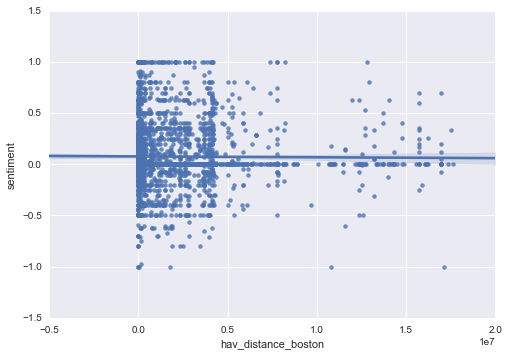

In [282]:
import seaborn as sns;
sns.set(color_codes=True)
ax = sns.regplot(x="hav_distance_boston", y="sentiment", data=df_redsox_wins)

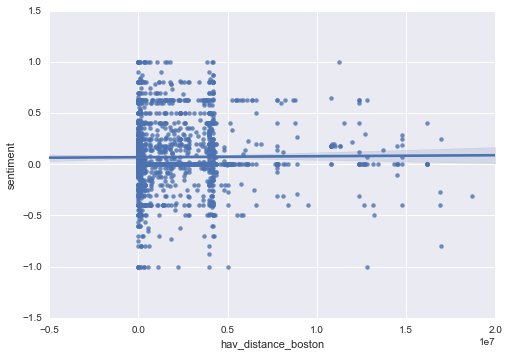

In [283]:
import seaborn as sns;
sns.set(color_codes=True)
ax = sns.regplot(x="hav_distance_boston", y="sentiment", data=df_redsox_losses)

In [284]:
g = geocoder.arcgis('Staten Island, NY')
st_lat = g.latlng[0]
st_long = g.latlng[1]
print(st_lat, st_long)

40.562326887000495 -74.13985554899966


In [285]:
g = geocoder.arcgis('New Rochelle, NY')
nr_lat = g.latlng[0]
nr_long = g.latlng[1]
print(nr_lat, nr_long)

40.91148690300048 -73.78234877299963


In [286]:
# Define radius for New York. (Roughly 35-40 miles). Call it 50000.
gpxpy.geo.haversine_distance(st_lat, st_long, nr_lat, nr_long)

49139.11989752445

In [287]:
near_boston_sox = df_redsox[df_redsox['hav_distance_boston'] <= 50000]
near_boston_sox.shape

(1681, 12)

In [288]:
near_ny_sox = df_redsox[df_redsox['hav_distance_ny'] <= 50000]
near_ny_sox.shape

(194, 12)

In [289]:
sentiment_by_date = df_redsox.groupby('dates').mean()
sentiment_by_date_near_boston = near_boston_sox.groupby('dates').mean()
sentiment_by_date_near_ny = near_ny_sox.groupby('dates').mean()

In [290]:
sentiment_by_date

,retweet_count,favorite_count,latitude,longitude,sentiment,hav_distance_boston,hav_distance_ny
dates,,,,,,,
2016-08-06,129.519,2.142,37.765879,-82.133044,0.033535,2.061121e+06,2.032066e+06
2016-08-07,419.222,1.321,36.789503,-82.499985,0.072724,2.142292e+06,2.081744e+06
2016-08-08,107.294,1.814,36.731780,-70.905613,0.093011,2.134943e+06,2.137587e+06
2016-08-09,36.183,1.936,38.580474,-79.123002,0.128390,1.368217e+06,1.364452e+06
2016-08-10,141.631,2.907,35.481714,-72.152677,0.148311,1.976626e+06,1.966678e+06
2016-08-11,19.347,2.136,37.939016,-71.386290,0.058885,1.789284e+06,1.816509e+06
2016-08-12,45.946,2.520,37.525810,-72.746949,0.069843,1.785936e+06,1.813787e+06
2016-08-13,322.909,1.955,37.440439,-72.018785,0.082030,1.766416e+06,1.786148e+06
2016-08-14,0.000,0.000,35.645460,-74.725406,0.035605,2.254737e+06,2.197758e+06


In [291]:
outcomes = [
    '8/6 (L)',
    '8/7 (L)',
    '8/8 (No Game)',
    '8/9 (W—v. Yankees)',
    '8/10 (L—v. Yankees)',
    '8/11 (L—v. Yankees)',
    '8/12 (W)',
    '8/13 (W)',
    '8/14 (W)',
    '8/15 (W)',
    '8/16 (W)'
]
outcomes

['8/6 (L)',
 '8/7 (L)',
 '8/8 (No Game)',
 '8/9 (W—v. Yankees)',
 '8/10 (L—v. Yankees)',
 '8/11 (L—v. Yankees)',
 '8/12 (W)',
 '8/13 (W)',
 '8/14 (W)',
 '8/15 (W)',
 '8/16 (W)']

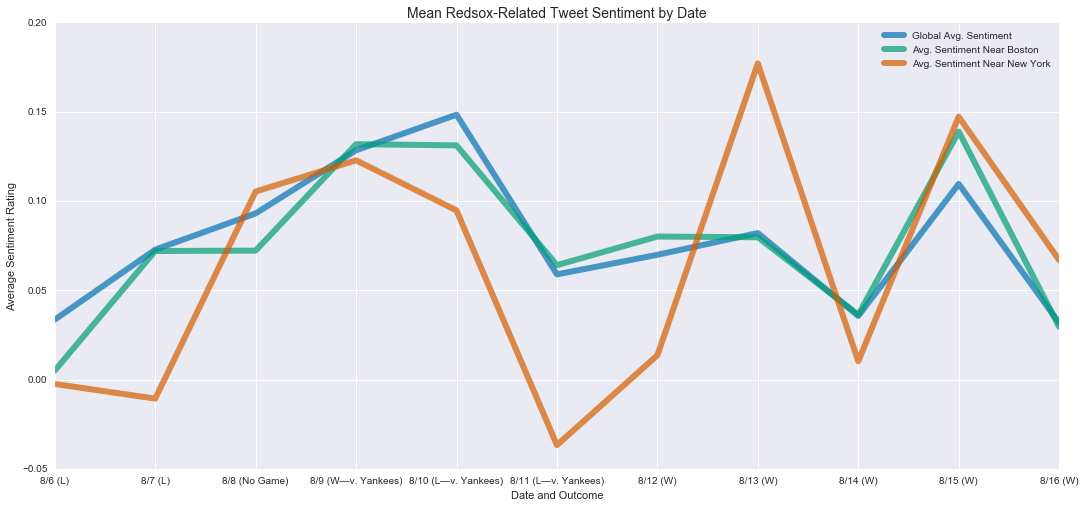

In [293]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax.plot(sentiment_by_date['sentiment'], linewidth=6, alpha=0.7)
ax2.plot(sentiment_by_date_near_boston['sentiment'], linewidth=6, alpha=0.7)
ax3.plot(sentiment_by_date_near_ny['sentiment'], linewidth=6, alpha=0.7)
ax.legend(['Global Avg. Sentiment', 'Avg. Sentiment Near Boston', 'Avg. Sentiment Near New York'])
plt.title('Mean Redsox-Related Tweet Sentiment by Date', size=14)
ax.set_xlabel('Date and Outcome')
ax.set_ylabel('Average Sentiment Rating')
ax.set_xticklabels(outcomes)
sns.set_palette('colorblind')
plt.savefig('sox_days.png')
plt.show()

In [294]:
# Compare redsox and yankees on same chart.

## Predicting Wins ##

In [295]:
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,dates,sentiment,hav_distance_boston,outcome,hav_distance_ny
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.071429,NaN,Loss,NaN
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.218182,NaN,Loss,NaN
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000,NaN,Loss,NaN
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000,4.169543e+06,Loss,3.935735e+06
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000,4.069056e+03,Loss,3.030860e+05


### Regression ###

In [296]:
# Likely wouldn't try to predict based on one tweet, but we'll try it. Also, lots of 0 sentiments could be an issue.
df_redsox['win'] = pd.get_dummies(df_redsox['outcome'])['Win']
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,dates,sentiment,hav_distance_boston,outcome,hav_distance_ny,win
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.071429,NaN,Loss,NaN,0.0
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,NaN,0,0,NaN,NaN,2016-08-06,0.218182,NaN,Loss,NaN,0.0
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000,NaN,Loss,NaN,0.0
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000,4.169543e+06,Loss,3.935735e+06,0.0
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000,4.069056e+03,Loss,3.030860e+05,0.0


In [588]:
df_redsox['win'].value_counts()

1.0    6000
0.0    5000
Name: win, dtype: int64

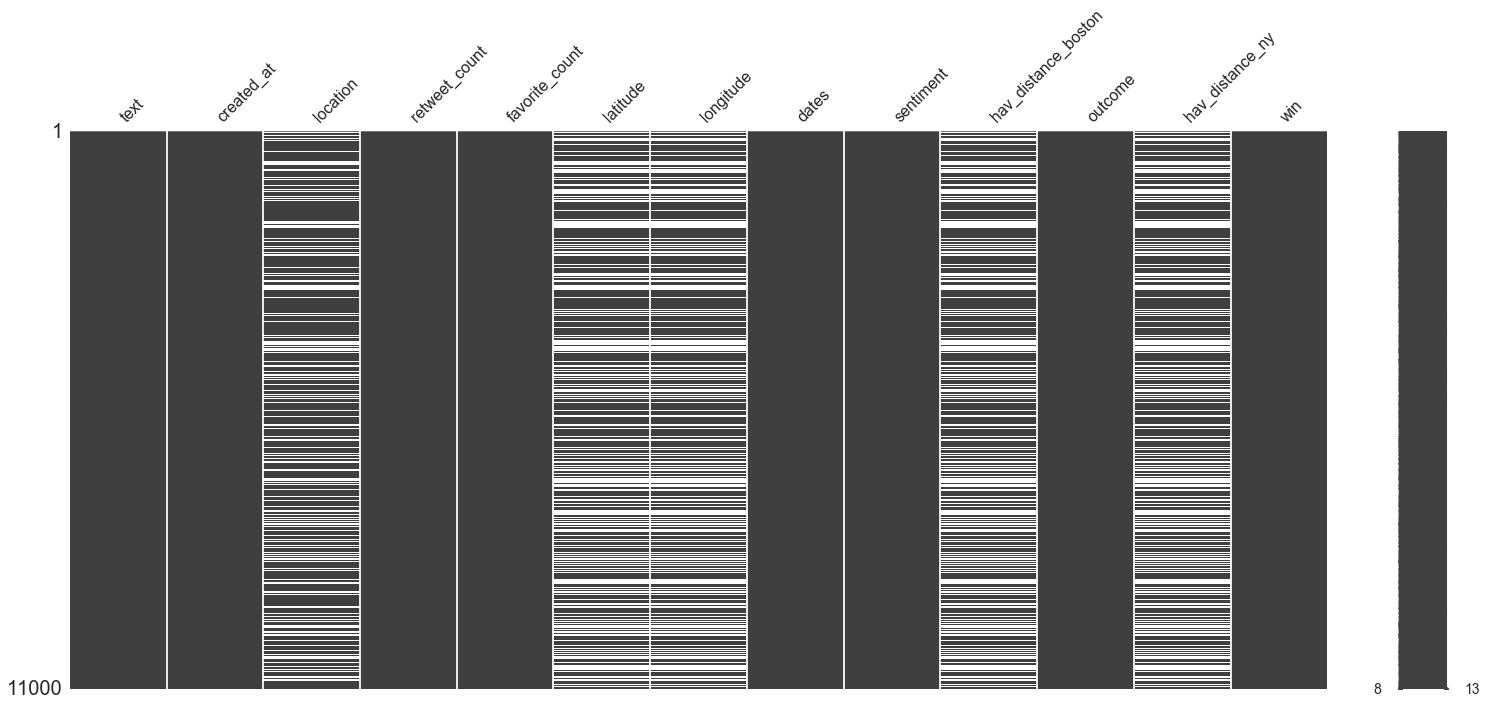

In [297]:
import missingno as msno
msno.matrix(df_redsox)

In [299]:
df_redsox.shape[0] - df_redsox['hav_distance_boston'].isnull().sum()

6603

In [300]:
df_redsox_no_null = df_redsox.dropna()

In [301]:
df_redsox_no_null.shape

(6603, 13)

In [303]:
X = df_redsox_no_null[['sentiment', 'hav_distance_boston']]
y = df_redsox_no_null['win']

In [304]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)

In [306]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5282, 2)
(1321, 2)
(5282,)
(1321,)


In [311]:
from sklearn.preprocessing import StandardScaler
# Define a scaler for normalizing the data.
scaler = StandardScaler()
# Get scaled data.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [339]:
# With a binary outcome variable, let's try logistic regression.
np.random.seed(9)
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(X_train, y_train)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("MSE: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
print('R Squared: ', r2_score(y_test, y_hat_lrg))

Coefficients: 
 [[  3.02508540e-15   1.15256271e-08]]
MSE: 0.46
Variance score: 0.54
R Squared:  -0.850140056022


In [340]:
# What about with gridsearch and cross validation?
np.random.seed(9)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV
lrg = LogisticRegression()
parameters = {'solver': ['lbfgs', 'liblinear', 'sag']} # Convergence warning with newton-cg
clf_lrg = GridSearchCV(lrg, parameters, cv=10)
clf_lrg.fit(X_train, y_train)
best_lrg = clf_lrg.best_estimator_
y_hat_lrg = best_lrg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_hat_lrg))
print('Score: ', best_lrg.score(X_test, y_test))
print('R Squared: ', r2_score(y_test, y_hat_lrg))

MSE:  0.459500378501
Score:  0.540499621499
R Squared:  -0.850140056022


Given the negative R2, it seems this was not at all successful. It could very well be that the model just can't find anything in our data.

In [343]:
# Ridge?
np.random.seed(9)
from sklearn.linear_model import Ridge
rrg = Ridge()
parameters = {'solver': ['auto', 'lsqr', 'sag']} # Convergence warning with newton-cg
clf_rrg = GridSearchCV(rrg, parameters, cv=10)
clf_rrg.fit(X_train, y_train)
best_rrg = clf_rrg.best_estimator_
y_hat_rrg = best_rrg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_hat_rrg))
print('Score: ', best_rrg.score(X_test, y_test))
print('R Squared: ', r2_score(y_test, y_hat_rrg))

MSE:  0.248780103975
Score:  -0.00169239687622
R Squared:  -0.00169239687622


In [344]:
# Lasso?
np.random.seed(9)
from sklearn.linear_model import Lasso
lsr = Ridge()
parameters = {'alpha': [0, 0.1, 0.5, 1]} # Convergence warning with newton-cg
clf_lsr = GridSearchCV(lsr, parameters, cv=10)
clf_lsr.fit(X_train, y_train)
best_lsr = clf_lsr.best_estimator_
y_hat_lsr = best_lsr.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_hat_lsr))
print('Score: ', best_rrg.score(X_test, y_test))
print('R Squared: ', r2_score(y_test, y_hat_lsr))

MSE:  0.248780103975
Score:  -0.00169239687622
R Squared:  -0.00169239687622


### Classification with Count Vectorizer ###

First, bin data by distance to home city. We'll create three separate datasets based on distance.

In [222]:
df_redsox['hav_distance_boston'].describe()

count    6.603000e+03
mean     1.951753e+06
std      2.842985e+06
min      0.000000e+00
25%      4.474498e+04
50%      7.606446e+05
75%      2.908099e+06
max      1.870660e+07
Name: hav_distance_boston, dtype: float64

In [231]:
df_redsox.shape

(11000, 12)

In [464]:
# dist_1 = closest to Boston, dist_3 = farthest. ~70 mile bound, ~1300 mile bound, everything farther.
df_redsox_dist_1 = df_redsox[df_redsox['hav_distance_boston'] <= 120000]
df_redsox_dist_2 = df_redsox[(df_redsox['hav_distance_boston'] <= 2100000) & (df_redsox['hav_distance_boston'] > 120000)]
df_redsox_dist_3 = df_redsox[df_redsox['hav_distance_boston'] > 2100000]

In [465]:
df_redsox['hav_distance_boston'].isnull().sum()
11000 - df_redsox['hav_distance_boston'].isnull().sum()

6603

In [466]:
df_redsox_dist_1.shape

(2168, 13)

In [467]:
df_redsox_dist_2.shape

(2154, 13)

In [468]:
df_redsox_dist_3.shape

(2281, 13)

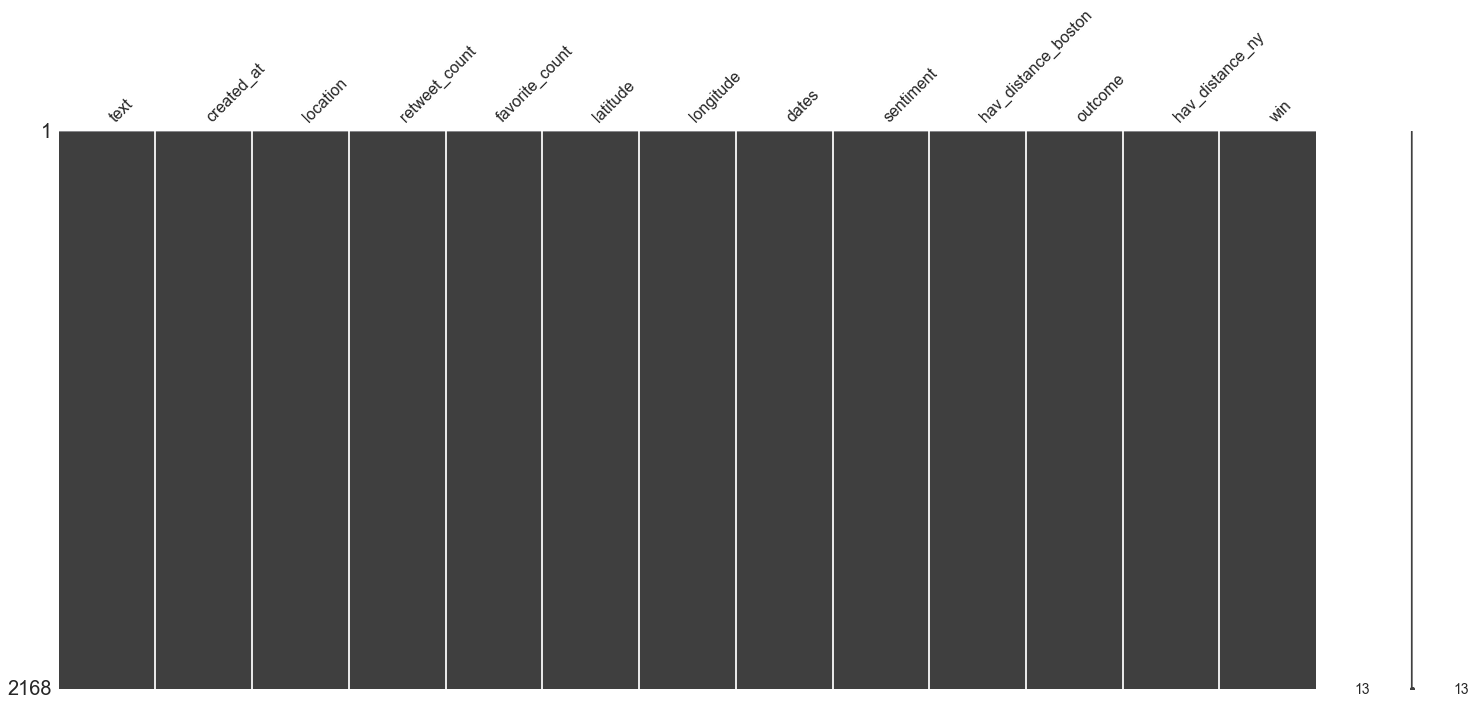

In [469]:
import missingno as msno
msno.matrix(df_redsox_dist_1)
#msno.matrix(df_redsox_dist_2)
#msno.matrix(df_redsox_dist_3)

In [470]:
sentiment_by_date_dist_1 = df_redsox_dist_1.groupby('dates').mean()
sentiment_by_date_dist_2 = df_redsox_dist_2.groupby('dates').mean()
sentiment_by_date_dist_3 = df_redsox_dist_3.groupby('dates').mean()

In [471]:
sentiment_by_date_dist_1

,retweet_count,favorite_count,latitude,longitude,sentiment,hav_distance_boston,hav_distance_ny,win
dates,,,,,,,,
2016-08-06,13.129213,6.797753,42.245053,-71.051652,-0.014264,19964.355647,300723.425777,0.0
2016-08-07,132.062500,5.150000,42.212290,-71.145349,0.069901,28240.655075,292104.631887,0.0
2016-08-08,14.105023,4.146119,42.158930,-70.885698,0.073880,39360.955851,309616.331839,0.0
2016-08-09,20.008734,5.917031,42.286362,-71.079798,0.131589,18874.642801,301180.156486,1.0
2016-08-10,45.333333,11.845411,42.315843,-71.101047,0.140038,13684.126429,300974.529478,0.0
2016-08-11,12.183333,6.195833,42.291860,-71.075434,0.065422,19837.791997,302080.962407,0.0
2016-08-12,20.774059,9.384937,42.299974,-71.146016,0.070458,19167.829198,297301.224390,1.0
2016-08-13,22.500000,6.530435,42.214807,-71.032618,0.095975,29146.482980,301111.002566,1.0
2016-08-14,0.000000,0.000000,42.281599,-71.158742,0.032755,16828.326986,294782.357383,1.0


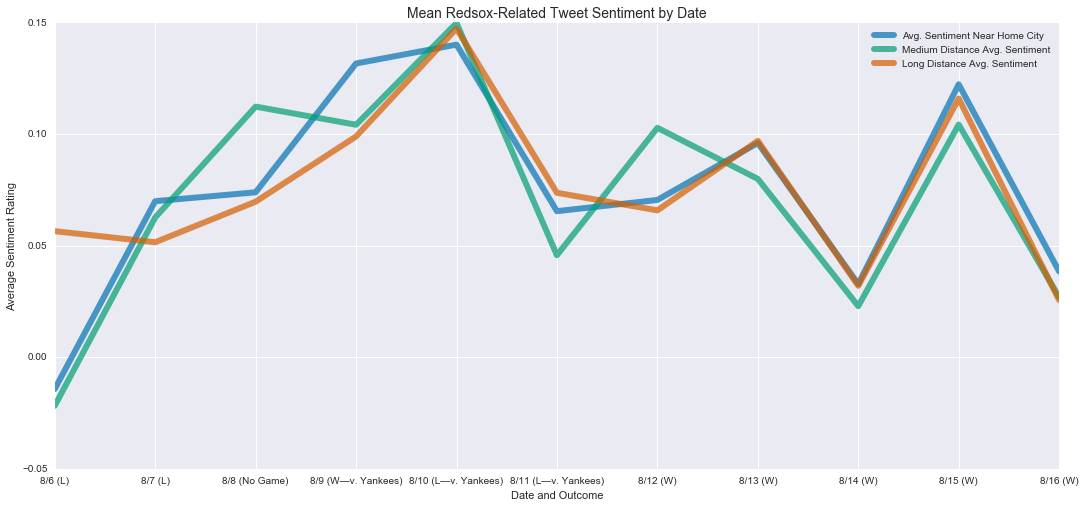

In [473]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax.plot(sentiment_by_date_dist_1['sentiment'], linewidth=6, alpha=0.7)
ax2.plot(sentiment_by_date_dist_2['sentiment'], linewidth=6, alpha=0.7)
ax3.plot(sentiment_by_date_dist_3['sentiment'], linewidth=6, alpha=0.7)
ax.legend(['Avg. Sentiment Near Home City', 'Medium Distance Avg. Sentiment', 'Long Distance Avg. Sentiment'])
plt.title('Mean Redsox-Related Tweet Sentiment by Date', size=14)
ax.set_xlabel('Date and Outcome')
ax.set_ylabel('Average Sentiment Rating')
ax.set_xticklabels(outcomes)
sns.set_palette('colorblind')
plt.savefig('sox_days_distance_bins.png')
plt.show()

#### Classification ####

In [540]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [541]:
df_redsox_dist_1.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,dates,sentiment,hav_distance_boston,outcome,hav_distance_ny,win
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.00,4069.055923,Loss,303086.014859,0.0
8,Tune in for game 2 of the east division semi f...,Sat Aug 06 23:58:04 +0000 2016,"Orleans, MA",1,0,41.789827,-69.989739,2016-08-06,0.15,108614.596426,Loss,356370.643701,0.0
12,"Boston Red Sox offense struggles again, shut o...",Sat Aug 06 23:57:02 +0000 2016,"Boston, MA",0,0,42.358428,-71.059766,2016-08-06,0.00,0.000000,Loss,305840.192695,0.0
26,RT @RedSox: #BigPapi’s still got it! https://t...,Sat Aug 06 23:52:42 +0000 2016,"Fall River, MA. USA",173,0,41.701486,-71.155050,2016-08-06,0.00,73471.283012,Loss,262524.780066,0.0
41,RT @985TheSportsHub: #RedSox bats silenced in ...,Sat Aug 06 23:46:37 +0000 2016,"Massachusetts, USA",3,0,42.365650,-71.108317,2016-08-06,0.00,4069.055923,Loss,303086.014859,0.0


In [589]:
df_redsox_dist_1['win'].value_counts()

1.0    1164
0.0    1004
Name: win, dtype: int64

In [542]:
df_tweets_dist_1 = df_redsox_dist_1['text']
clean_tweets = []
for tweet in df_tweets_dist_1:
    tweet_clean = re.sub(r'(?:\@|https?\://)\S+', '', tweet)
    tweet_clean = re.sub(r'[1-9]','', tweet_clean)
    tweet_clean = re.sub(r'\w*\d\w*', '', tweet_clean)
    clean_tweets.append(tweet_clean)

df_clean_dist_1 = pd.Series(clean_tweets)

In [543]:
# Stopwords.
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
# Add stopwords.
stop.update(['00', '000', '04', '05', '06', '08', '10', '100', '1000', '103', '104', '105', '10th', '10x1',
            '11', '115', '117', '12', '13', '14', '140', '15', '150'])

In [544]:
vectorizer = CountVectorizer(analyzer = "word", stop_words = stop, max_features = 4000) 
v_text = vectorizer.fit_transform(df_clean_dist_1)
# Transform the sparse matrix into a dataframe
df_text = pd.DataFrame(v_text.todense(), columns=vectorizer.get_feature_names())
print(df_text.shape)
df_text.head()

(2168, 3098)


,aa,aaa,aaron,ab,abandon,able,aboard,absolute,absolutely,abysmal,...,york,young,youtube,yovani,yr,yrs,yup,zach,zack,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Great, 'CountVectorizer' is working, so now let's split the data into training and test data. We'll split the data so that each day's worth of data has a turn as the test data and we train on the other ten days of data.

In [608]:
df_test_dist_1 = df_redsox_dist_1[df_redsox_dist_1['dates'] == '2016-08-06']
df_train_dist_1 = df_redsox_dist_1[df_redsox_dist_1['dates'] != '2016-08-06']
y_test_dist_1 = df_test_dist_1['win']
y_train_dist_1 = df_train_dist_1['win']

In [609]:
print(df_test_dist_1['dates'].value_counts())
print(df_train_dist_1['dates'].value_counts())

2016-08-06    178
Name: dates, dtype: int64
2016-08-11    240
2016-08-12    239
2016-08-13    230
2016-08-09    229
2016-08-08    219
2016-08-10    207
2016-08-16    194
2016-08-07    160
2016-08-14    136
2016-08-15    136
Name: dates, dtype: int64


In [610]:
df_test_dist_1.shape[0] + df_train_dist_1.shape[0] == df_redsox_dist_1.shape[0]

True

In [611]:
df_test_dist_1.shape[0] == y_test_dist_1.shape[0]

True

In [612]:
df_train_dist_1.shape[0] == y_train_dist_1.shape[0]

True

In [613]:
print(y_test_dist_1.unique())
print(y_train_dist_1.unique())

[ 0.]
[ 0.  1.]


In [614]:
# Clean training data.
df_tweets_train_dist_1 = df_train_dist_1['text']
clean_tweets = []
for tweet in df_tweets_train_dist_1:
    tweet_clean = re.sub(r'(?:\@|https?\://)\S+', '', tweet)
    tweet_clean = re.sub(r'[1-9]','', tweet_clean)
    tweet_clean = re.sub(r'\w*\d\w*', '', tweet_clean)
    clean_tweets.append(tweet_clean)

df_clean_train_dist_1 = pd.Series(clean_tweets)

# Clean test data.
df_tweets_test_dist_1 = df_test_dist_1['text']
clean_tweets = []
for tweet in df_tweets_test_dist_1:
    tweet_clean = re.sub(r'(?:\@|https?\://)\S+', '', tweet)
    tweet_clean = re.sub(r'[1-9]','', tweet_clean)
    tweet_clean = re.sub(r'\w*\d\w*', '', tweet_clean)
    clean_tweets.append(tweet_clean)

df_clean_test_dist_1 = pd.Series(clean_tweets)

In [615]:
# Stopwords.
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
# Add stopwords.
stop.update(['00', '000', '04', '05', '06', '08', '10', '100', '1000', '103', '104', '105', '10th', '10x1',
            '11', '115', '117', '12', '13', '14', '140', '15', '150'])

In [616]:
vectorizer = CountVectorizer(analyzer = "word", stop_words = stop, max_features = 4000) 
v_text_train = vectorizer.fit_transform(df_clean_train_dist_1)
v_text_test = vectorizer.transform(df_clean_test_dist_1)

# Transform the sparse matrix into a dataframe
df_text_train = pd.DataFrame(v_text_train.todense(), columns=vectorizer.get_feature_names())
df_text_test = pd.DataFrame(v_text_test.todense(), columns=vectorizer.get_feature_names())
print(df_text_train.shape)
df_text_train.head()

(1990, 2926)


,aa,aaa,aaron,ab,abandon,able,aboard,absolute,absolutely,abysmal,...,yoga,york,young,youtube,yovani,yrs,yup,zach,zack,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [617]:
print(df_text_test.shape)
df_text_test.head()

(178, 2926)


,aa,aaa,aaron,ab,abandon,able,aboard,absolute,absolutely,abysmal,...,yoga,york,young,youtube,yovani,yrs,yup,zach,zack,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [618]:
X_train_dist_1 = df_text_train
X_test_dist_1 = df_text_test

In [619]:
# Random Forest Classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
np.random.seed(9)
forest = RandomForestClassifier(n_estimators = 400) 
forest.fit(X_train_dist_1, y_train_dist_1)
y_hat = forest.predict(X_test_dist_1)
confusion_matrix(y_hat, y_test_dist_1, labels=[1,0])

array([[  0, 109],
       [  0,  69]])

In [623]:
y_hat_proba = forest.predict_proba(X_test_dist_1)
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test_dist_1, y_hat_proba[:,1])
rfc_roc_auc = roc_auc_score(y_hat, y_test_dist_1)
print('AUC: %0.2f' % rfc_roc_auc)
print(classification_report(y_test_dist_1, y_hat))

AUC: 0.50
             precision    recall  f1-score   support

        0.0       1.00      0.39      0.56       178
        1.0       0.00      0.00      0.00         0

avg / total       1.00      0.39      0.56       178



//anaconda/lib/python3.5/site-packages/sklearn/metrics/ranking.py:538: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [621]:
print(y_test_dist_1.unique())
print(y_train_dist_1.unique())

[ 0.]
[ 0.  1.]


That was one iteration with `dist_1` just to see the workflow, but now we'll loop over all test/train splits.

In [641]:
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
np.random.seed(9)

In [649]:
dates = df_redsox['dates'].unique()
dates

array(['2016-08-06T00:00:00.000000000', '2016-08-07T00:00:00.000000000',
       '2016-08-08T00:00:00.000000000', '2016-08-09T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-08-11T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-08-15T00:00:00.000000000', '2016-08-16T00:00:00.000000000',
       '2016-08-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [650]:
for date in dates:
    print(df_redsox_dist_1['dates'].iloc[0] == date)

True
False
False
False
False
False
False
False
False
False
False


In [651]:
auc_scores = []
for date in dates:
    df_test_dist_1 = df_redsox_dist_1[df_redsox_dist_1['dates'] == date]
    df_train_dist_1 = df_redsox_dist_1[df_redsox_dist_1['dates'] != date]
    y_test_dist_1 = df_test_dist_1['win']
    y_train_dist_1 = df_train_dist_1['win']

    # Clean training data.
    df_tweets_train_dist_1 = df_train_dist_1['text']
    clean_tweets = []
    for tweet in df_tweets_train_dist_1:
        tweet_clean = re.sub(r'(?:\@|https?\://)\S+', '', tweet)
        tweet_clean = re.sub(r'[1-9]','', tweet_clean)
        tweet_clean = re.sub(r'\w*\d\w*', '', tweet_clean)
        clean_tweets.append(tweet_clean)
    df_clean_train_dist_1 = pd.Series(clean_tweets)

    # Clean test data.
    df_tweets_test_dist_1 = df_test_dist_1['text']
    clean_tweets = []
    for tweet in df_tweets_test_dist_1:
        tweet_clean = re.sub(r'(?:\@|https?\://)\S+', '', tweet)
        tweet_clean = re.sub(r'[1-9]','', tweet_clean)
        tweet_clean = re.sub(r'\w*\d\w*', '', tweet_clean)
        clean_tweets.append(tweet_clean)
    df_clean_test_dist_1 = pd.Series(clean_tweets)

    # Stopwords.
    stop = set(stopwords.words('english'))
    # Add stopwords.
    stop.update(['00', '000', '04', '05', '06', '08', '10', '100', '1000', '103', '104', '105', '10th', '10x1',
                '11', '115', '117', '12', '13', '14', '140', '15', '150'])

    # Vectorizer.
    vectorizer = CountVectorizer(analyzer = "word", stop_words = stop, max_features = 4000) 
    v_text_train = vectorizer.fit_transform(df_clean_train_dist_1)
    v_text_test = vectorizer.transform(df_clean_test_dist_1)

    # Transform the sparse matrix into a dataframe
    df_text_train = pd.DataFrame(v_text_train.todense(), columns=vectorizer.get_feature_names())
    df_text_test = pd.DataFrame(v_text_test.todense(), columns=vectorizer.get_feature_names())

    X_train_dist_1 = df_text_train
    X_test_dist_1 = df_text_test

    # Random Forest Classification.

    forest = RandomForestClassifier(n_estimators = 400) 
    forest.fit(X_train_dist_1, y_train_dist_1)
    y_hat = forest.predict(X_test_dist_1)
    confusion_matrix(y_hat, y_test_dist_1, labels=[1,0])

    rfc_roc_auc = roc_auc_score(y_hat, y_test_dist_1)
    
    auc_scores.append(rfc_roc_auc)

In [657]:
# AUC scores after cross validation on dist_1 dataset. Something is wrong: bad data or bad analysis methods.
auc_scores

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [659]:
auc_scores = []
for date in dates:
    df_test_dist_2 = df_redsox_dist_2[df_redsox_dist_2['dates'] == date]
    df_train_dist_2 = df_redsox_dist_2[df_redsox_dist_2['dates'] != date]
    y_test_dist_2 = df_test_dist_2['win']
    y_train_dist_2 = df_train_dist_2['win']

    # Clean training data.
    df_tweets_train_dist_2 = df_train_dist_2['text']
    clean_tweets = []
    for tweet in df_tweets_train_dist_2:
        tweet_clean = re.sub(r'(?:\@|https?\://)\S+', '', tweet)
        tweet_clean = re.sub(r'[1-9]','', tweet_clean)
        tweet_clean = re.sub(r'\w*\d\w*', '', tweet_clean)
        clean_tweets.append(tweet_clean)
    df_clean_train_dist_2 = pd.Series(clean_tweets)

    # Clean test data.
    df_tweets_test_dist_2 = df_test_dist_2['text']
    clean_tweets = []
    for tweet in df_tweets_test_dist_2:
        tweet_clean = re.sub(r'(?:\@|https?\://)\S+', '', tweet)
        tweet_clean = re.sub(r'[1-9]','', tweet_clean)
        tweet_clean = re.sub(r'\w*\d\w*', '', tweet_clean)
        clean_tweets.append(tweet_clean)
    df_clean_test_dist_2 = pd.Series(clean_tweets)

    # Stopwords.
    stop = set(stopwords.words('english'))
    # Add stopwords.
    stop.update(['00', '000', '04', '05', '06', '08', '10', '100', '1000', '103', '104', '105', '10th', '10x1',
                '11', '115', '117', '12', '13', '14', '140', '15', '150'])

    # Vectorizer.
    vectorizer = CountVectorizer(analyzer = "word", stop_words = stop, max_features = 4000) 
    v_text_train = vectorizer.fit_transform(df_clean_train_dist_2)
    v_text_test = vectorizer.transform(df_clean_test_dist_2)

    # Transform the sparse matrix into a dataframe
    df_text_train = pd.DataFrame(v_text_train.todense(), columns=vectorizer.get_feature_names())
    df_text_test = pd.DataFrame(v_text_test.todense(), columns=vectorizer.get_feature_names())

    X_train_dist_2 = df_text_train
    X_test_dist_2 = df_text_test

    # Random Forest Classification.

    forest = RandomForestClassifier(n_estimators = 400) 
    forest.fit(X_train_dist_2, y_train_dist_2)
    y_hat = forest.predict(X_test_dist_2)
    confusion_matrix(y_hat, y_test_dist_2, labels=[1,0])

    rfc_roc_auc = roc_auc_score(y_hat, y_test_dist_2)
    
    auc_scores.append(rfc_roc_auc)

In [660]:
# AUC scores after cross validation on dist_1 dataset. Something is wrong: bad data or bad analysis methods.
auc_scores

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [661]:
auc_scores = []
for date in dates:
    df_test_dist_3 = df_redsox_dist_3[df_redsox_dist_3['dates'] == date]
    df_train_dist_3 = df_redsox_dist_3[df_redsox_dist_3['dates'] != date]
    y_test_dist_3 = df_test_dist_3['win']
    y_train_dist_3 = df_train_dist_3['win']

    # Clean training data.
    df_tweets_train_dist_3 = df_train_dist_3['text']
    clean_tweets = []
    for tweet in df_tweets_train_dist_3:
        tweet_clean = re.sub(r'(?:\@|https?\://)\S+', '', tweet)
        tweet_clean = re.sub(r'[1-9]','', tweet_clean)
        tweet_clean = re.sub(r'\w*\d\w*', '', tweet_clean)
        clean_tweets.append(tweet_clean)
    df_clean_train_dist_3 = pd.Series(clean_tweets)

    # Clean test data.
    df_tweets_test_dist_3 = df_test_dist_3['text']
    clean_tweets = []
    for tweet in df_tweets_test_dist_3:
        tweet_clean = re.sub(r'(?:\@|https?\://)\S+', '', tweet)
        tweet_clean = re.sub(r'[1-9]','', tweet_clean)
        tweet_clean = re.sub(r'\w*\d\w*', '', tweet_clean)
        clean_tweets.append(tweet_clean)
    df_clean_test_dist_3 = pd.Series(clean_tweets)

    # Stopwords.
    stop = set(stopwords.words('english'))
    # Add stopwords.
    stop.update(['00', '000', '04', '05', '06', '08', '10', '100', '1000', '103', '104', '105', '10th', '10x1',
                '11', '115', '117', '12', '13', '14', '140', '15', '150'])

    # Vectorizer.
    vectorizer = CountVectorizer(analyzer = "word", stop_words = stop, max_features = 4000) 
    v_text_train = vectorizer.fit_transform(df_clean_train_dist_3)
    v_text_test = vectorizer.transform(df_clean_test_dist_3)

    # Transform the sparse matrix into a dataframe
    df_text_train = pd.DataFrame(v_text_train.todense(), columns=vectorizer.get_feature_names())
    df_text_test = pd.DataFrame(v_text_test.todense(), columns=vectorizer.get_feature_names())

    X_train_dist_3 = df_text_train
    X_test_dist_3 = df_text_test

    # Random Forest Classification.

    forest = RandomForestClassifier(n_estimators = 400) 
    forest.fit(X_train_dist_3, y_train_dist_3)
    y_hat = forest.predict(X_test_dist_3)
    confusion_matrix(y_hat, y_test_dist_3, labels=[1,0])

    rfc_roc_auc = roc_auc_score(y_hat, y_test_dist_3)
    
    auc_scores.append(rfc_roc_auc)

In [662]:
# AUC scores after cross validation on dist_1 dataset. Something is wrong: bad data or bad analysis methods.
auc_scores

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]